# CAPSTONE PROJECT - Junior Data Analyst Program

## Import Packages

In [358]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder

## Connect SQLite to Python

In [359]:
db = sqlite3.connect('Restaurant_Dataset.db')
restaurant_db = db.cursor()

restaurant_db.execute("SELECT name FROM sqlite_master WHERE type='table'")
print(restaurant_db.fetchall())

[('Orders',), ('Customers',), ('Vendors',), ('Locations',)]


## Data Preparation Using SQL

In [360]:
orders = pd.read_sql_query('''
select *
from orders
''', db)

customers = pd.read_sql_query('''
select *
from customers
''', db)

vendors = pd.read_sql_query('''
select *
from vendors
''', db)

locations = pd.read_sql_query('''
select *
from locations
''', db)

In [361]:
print(orders.shape)
print(customers.shape)
print(vendors.shape)
print(locations.shape)

(9768, 12)
(9768, 7)
(100, 20)
(16720, 4)


In [362]:
print('Order: \n', list(orders.columns), '\n')
print('Customer: \n', list(customers.columns), '\n')
print('Vendor: \n', list(vendors.columns), '\n')
print('Locations: \n', list(locations.columns), '\n')

Order: 
 ['order_id', 'customer_id', 'item_count', 'grand_total', 'payment_mode', 'is_favorite', 'is_rated', 'driver_rating', 'deliverydistance', 'vendor_id', 'created_at', 'LOCATION_NUMBER'] 

Customer: 
 ['customer_id', 'gender', 'dob', 'status', 'verified', 'created_at', 'updated_at'] 

Vendor: 
 ['vendor_id', 'authentication_id', 'latitude', 'longitude', 'vendor_category_en', 'delivery_charge', 'serving_distance', 'is_open', 'OpeningTime', 'prepration_time', 'discount_percentage', 'status', 'verified', 'rank', 'vendor_rating', 'vendor_tag', 'vendor_tag_name', 'created_at', 'updated_at', 'device_type'] 

Locations: 
 ['customer_id', 'location_number', 'latitude', 'longitude'] 



In [363]:
order_missing = pd.isnull(orders).sum()
customer_missing = pd.isnull(customers).sum()
vendor_missing = pd.isnull(vendors).sum()
location_missing = pd.isnull(locations).sum()

print("Jumlah Data Missing")
print()
print(order_missing)
print()
print(customer_missing)
print()
print(vendor_missing)
print()
print(location_missing)

Jumlah Data Missing

order_id              4
customer_id           0
item_count          507
grand_total           0
payment_mode          0
is_favorite         100
is_rated              0
driver_rating         0
deliverydistance      0
vendor_id             0
created_at            0
LOCATION_NUMBER       0
dtype: int64

customer_id    0
gender         0
dob            0
status         0
verified       0
created_at     0
updated_at     0
dtype: int64

vendor_id              0
authentication_id      0
latitude               0
longitude              0
vendor_category_en     0
delivery_charge        0
serving_distance       0
is_open                0
OpeningTime            9
prepration_time        0
discount_percentage    0
status                 0
verified               0
rank                   0
vendor_rating          0
vendor_tag             3
vendor_tag_name        3
created_at             0
updated_at             0
device_type            0
dtype: int64

customer_id        0
location_

We assume every transactions without `order_id` are fraud, and `item_count` will be filled with median. We also change `is_favourite` into binary.

In [364]:
orders['item_count'].describe()

count    9261.000000
mean        2.379009
std         1.597841
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        20.000000
Name: item_count, dtype: float64

In [365]:
orders['item_count'].fillna(int(orders['item_count'].median()), inplace=True)

In [366]:
order_missing = pd.isnull(orders).sum()
order_missing

order_id              4
customer_id           0
item_count            0
grand_total           0
payment_mode          0
is_favorite         100
is_rated              0
driver_rating         0
deliverydistance      0
vendor_id             0
created_at            0
LOCATION_NUMBER       0
dtype: int64

In [367]:
encode = LabelEncoder()
orders['is_favorite'] = encode.fit_transform(orders['is_favorite'])
orders.head()

,order_id,customer_id,item_count,grand_total,payment_mode,is_favorite,is_rated,driver_rating,deliverydistance,vendor_id,created_at,LOCATION_NUMBER
0,163241.0,9ZTJB1L,2.0,14.4,1,1,No,0.0,0.0,83,2019-08-01 05:31:33,0
1,163246.0,6C7D1O2,3.0,18.2,2,1,No,0.0,0.0,83,2019-08-01 05:37:05,0
2,163265.0,VCBBSUB,1.0,4.6,1,1,No,0.0,0.0,78,2019-08-01 06:03:59,0
3,163274.0,ZBNP36W,1.0,5.7,1,1,No,0.0,0.0,195,2019-08-01 06:34:38,0
4,163321.0,BJ1GYQY,2.0,15.8,1,1,No,0.0,0.0,75,2019-08-01 17:06:17,0


In [368]:
orders = orders.dropna(axis=0, how="any")

In [369]:
order_missing = pd.isnull(orders).sum()
order_missing

order_id            0
customer_id         0
item_count          0
grand_total         0
payment_mode        0
is_favorite         0
is_rated            0
driver_rating       0
deliverydistance    0
vendor_id           0
created_at          0
LOCATION_NUMBER     0
dtype: int64

In [370]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9764 entries, 0 to 9767
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          9764 non-null   float64
 1   customer_id       9764 non-null   object 
 2   item_count        9764 non-null   float64
 3   grand_total       9764 non-null   float64
 4   payment_mode      9764 non-null   int64  
 5   is_favorite       9764 non-null   int32  
 6   is_rated          9764 non-null   object 
 7   driver_rating     9764 non-null   float64
 8   deliverydistance  9764 non-null   float64
 9   vendor_id         9764 non-null   int64  
 10  created_at        9764 non-null   object 
 11  LOCATION_NUMBER   9764 non-null   int64  
dtypes: float64(5), int32(1), int64(3), object(3)
memory usage: 953.5+ KB


In [371]:
locations = locations.dropna(axis=0, how="any")

In [372]:
locations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16717 entries, 0 to 16719
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      16717 non-null  object 
 1   location_number  16717 non-null  int64  
 2   latitude         16717 non-null  float64
 3   longitude        16717 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 653.0+ KB


Moving to this step, our data has been cleaned

In [373]:
#tabel 1
table_1 = pd.read_sql_query(
    '''
    SELECT  customers.customer_id,
            customers.gender,
            customers.dob, 
            locations.location_number,
            orders.created_at, 
            orders.item_count, 
            orders.grand_total, 
            vendors.vendor_id,
            vendors.vendor_category_en,
            vendors.discount_percentage,
            strftime('%Y', orders.created_at) as year,
            strftime('%m', orders.created_at) as month,
            strftime('%w', orders.created_at) as day_name,
            strftime('%Y-%m', orders.created_at) as date
    FROM orders
    LEFT JOIN customers ON orders.customer_id = customers.customer_id
    INNER JOIN vendors ON vendors.vendor_id = orders.vendor_id
    INNER JOIN locations ON locations.customer_id = orders.customer_id
    ''',db)

In [374]:
table_1 = table_1.sort_values(by = ['date'])
table_1['age'] = abs(table_1['dob'] - 2022)

In [375]:
table_1.head()

,customer_id,gender,dob,location_number,created_at,item_count,grand_total,vendor_id,vendor_category_en,discount_percentage,year,month,day_name,date,age
4059,3WB9JM8,male,1997,3,2019-06-21 17:18:37,1.0,11.4,82,Restaurants,0.0,2019,06,5,2019-06,25
3701,RCCJYBM,male,1991,3,2019-06-12 23:05:28,4.0,19.3,193,Restaurants,0.0,2019,06,3,2019-06,31
3700,RCCJYBM,male,1991,0,2019-06-12 23:05:28,4.0,19.3,193,Restaurants,0.0,2019,06,3,2019-06,31
3699,RCCJYBM,male,1991,0,2019-06-12 23:05:28,4.0,19.3,193,Restaurants,0.0,2019,06,3,2019-06,31
3698,NJDUUUU,male,1991,1,2019-06-12 23:04:08,5.0,22.8,78,Restaurants,0.0,2019,06,3,2019-06,31


In [376]:
table_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16925 entries, 4059 to 16924
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          16925 non-null  object 
 1   gender               16925 non-null  object 
 2   dob                  16925 non-null  int64  
 3   location_number      16925 non-null  int64  
 4   created_at           16925 non-null  object 
 5   item_count           15975 non-null  float64
 6   grand_total          16925 non-null  float64
 7   vendor_id            16925 non-null  int64  
 8   vendor_category_en   16925 non-null  object 
 9   discount_percentage  16925 non-null  float64
 10  year                 16925 non-null  object 
 11  month                16925 non-null  object 
 12  day_name             16925 non-null  object 
 13  date                 16925 non-null  object 
 14  age                  16925 non-null  int64  
dtypes: float64(3), int64(4), object(8

## Analysis Tasks
1. Plotting data to gain insights.
2. Giving best recommendation based on data.

## Data Exploration

In [377]:
table_1.head()

,customer_id,gender,dob,location_number,created_at,item_count,grand_total,vendor_id,vendor_category_en,discount_percentage,year,month,day_name,date,age
4059,3WB9JM8,male,1997,3,2019-06-21 17:18:37,1.0,11.4,82,Restaurants,0.0,2019,06,5,2019-06,25
3701,RCCJYBM,male,1991,3,2019-06-12 23:05:28,4.0,19.3,193,Restaurants,0.0,2019,06,3,2019-06,31
3700,RCCJYBM,male,1991,0,2019-06-12 23:05:28,4.0,19.3,193,Restaurants,0.0,2019,06,3,2019-06,31
3699,RCCJYBM,male,1991,0,2019-06-12 23:05:28,4.0,19.3,193,Restaurants,0.0,2019,06,3,2019-06,31
3698,NJDUUUU,male,1991,1,2019-06-12 23:04:08,5.0,22.8,78,Restaurants,0.0,2019,06,3,2019-06,31


### Sales Chart
Sales significantly increased in `2019-09` to `2019-10`

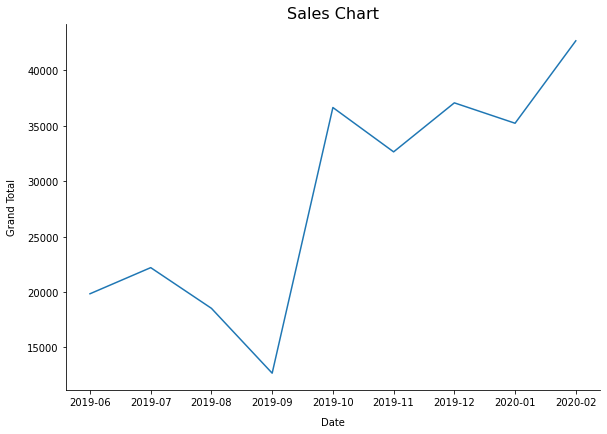

In [378]:
df_date = table_1.groupby('date')['grand_total'].sum()
df_date = pd.Series.to_frame(df_date)
g=sns.relplot(x="date", y="grand_total", kind="line",data=df_date, ci=None, height=2)
g.fig.set_size_inches(20,8)
plt.xlabel('Date', labelpad=10)
plt.ylabel('Grand Total', labelpad=10)
plt.title('Sales Chart', fontsize=16)
plt.show();

### Daily Sales

In [379]:
df_day = table_1.groupby('day_name')['grand_total'].sum()
df_day = pd.DataFrame(df_day)
df_day = df_day.reset_index()

df_day['day_name'] = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

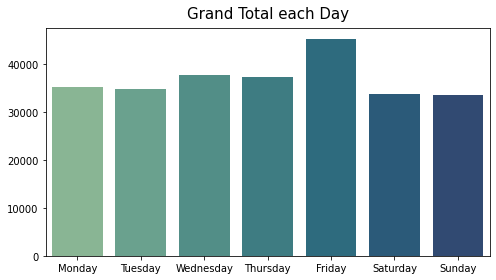

In [380]:
plt.rcParams["figure.figsize"] = [7, 4]
plt.rcParams["figure.autolayout"] = True

sns.barplot(x="day_name", y = "grand_total", palette="crest", data=df_day)
plt.ylabel('')
plt.xlabel('')
plt.title('Grand Total each Day', fontsize=15, pad=10)
plt.show()

### Customer Information

In [381]:
table_1['age'].describe()

count    16925.000000
mean        23.096366
std          7.297158
min         12.000000
25%         17.000000
50%         23.000000
75%         28.000000
max        122.000000
Name: age, dtype: float64

In [382]:
data_group = pd.crosstab(table_1['age'], table_1['gender'])

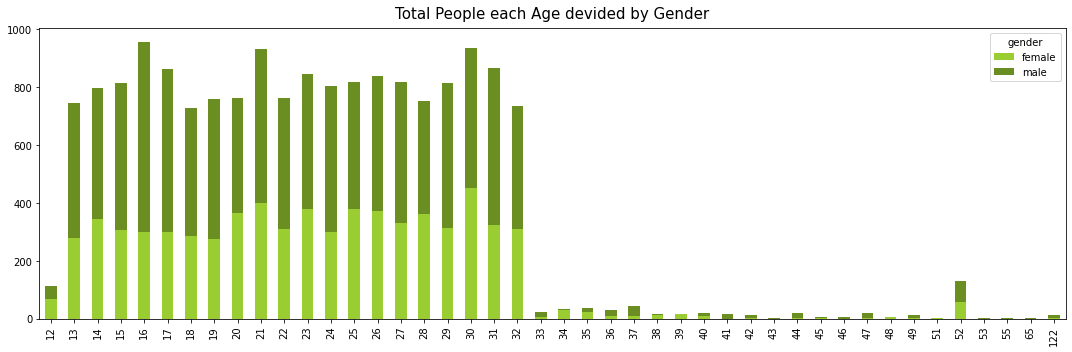

In [383]:
plt.rcParams["figure.figsize"] = [15, 5]
plt.rcParams["figure.autolayout"] = True
data_group.plot(kind='bar', stacked=True, color=['yellowgreen', 'olivedrab'])
plt.title('Total People each Age devided by Gender', fontsize=15, pad=10)
plt.xlabel('')
plt.show();

In [384]:
data_group2 = pd.crosstab(table_1['gender'], table_1['vendor_category_en'])
data_group2.reset_index(inplace=True)

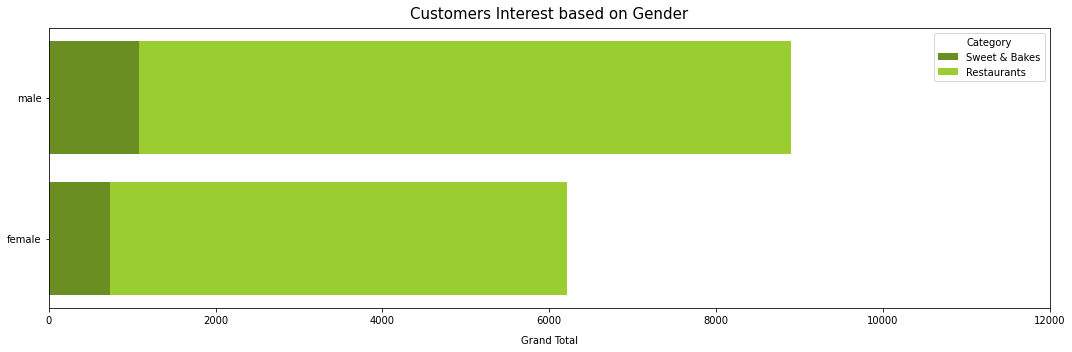

In [385]:
plt.xlim(0, 12000)
b1 = plt.barh(data_group2['gender'], data_group2['Restaurants'], color="yellowgreen")
b2 = plt.barh(data_group2['gender'], data_group2['Sweets & Bakes'], color="olivedrab")
plt.legend([b2, b1], ["Sweet & Bakes", "Restaurants"], title="Category", loc="upper right")
plt.title('Customers Interest based on Gender', fontsize=15, pad=10)
plt.xlabel('Grand Total', labelpad=10)
plt.ylabel('')
plt.show();

### Highest Sales by Vendor

In [386]:
df_vendor = table_1.groupby('vendor_id')['grand_total'].sum()
df_vendor = pd.DataFrame(df_vendor)
df_vendor.reset_index(inplace=True)
df_vendor_top_5 = df_vendor.sort_values(by=['grand_total'], ascending=False).head()

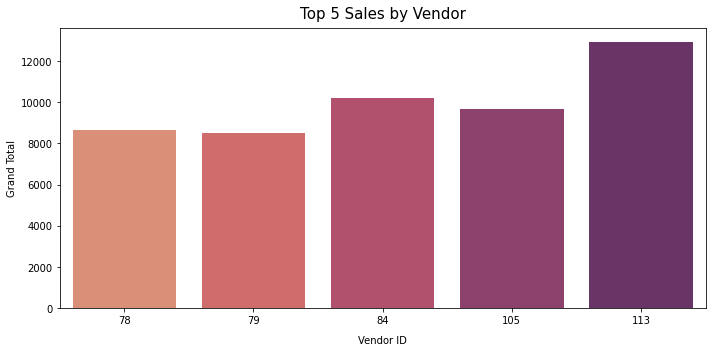

In [387]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams["figure.autolayout"] = True
sns.barplot(x="vendor_id", y="grand_total", palette="flare", data=df_vendor_top_5)
plt.title('Top 5 Sales by Vendor', fontsize=15, pad=10)
plt.xlabel('Vendor ID', labelpad=10)
plt.ylabel('Grand Total')
plt.show()

## Comparison Plot `2019-09` with `2019-10`

In [388]:
test_1 = table_1[table_1['date'] == '2019-09'] 
test_2 = table_1[table_1['date'] == '2019-10'] 

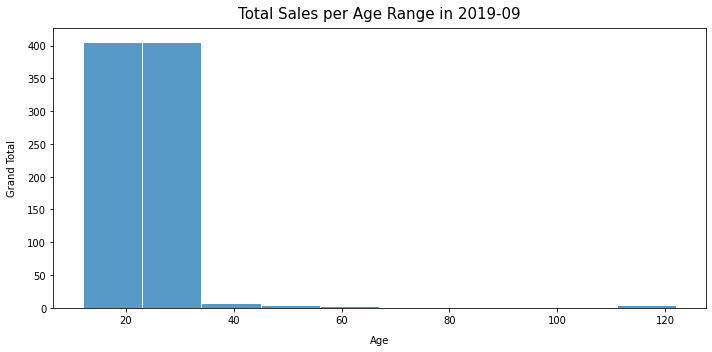

In [389]:
sns.histplot(test_1['age'], edgecolor = 'white', bins = 10)
plt.title('Total Sales per Age Range in 2019-09', fontsize=15, pad=10)
plt.xlabel('Age', labelpad=10)
plt.ylabel('Grand Total', labelpad=10)
plt.show();

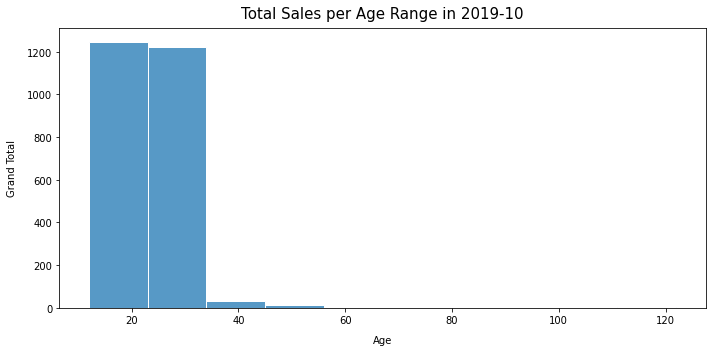

In [390]:
sns.histplot(test_2['age'], edgecolor = 'white', bins = 10)
plt.title('Total Sales per Age Range in 2019-10', fontsize=15, pad=10)
plt.xlabel('Age', labelpad=10)
plt.ylabel('Grand Total', labelpad=10)
plt.show();

## Friday Sales Effects

In [391]:
df_dday = table_1[table_1['day_name'] == '4']
df_dday = df_dday.groupby('vendor_id')['grand_total'].sum()
df_dday = pd.DataFrame(df_dday)
df_dday.reset_index(inplace=True)
df_dday = df_dday.sort_values('grand_total', ascending=False)
temp_d = df_dday.head()

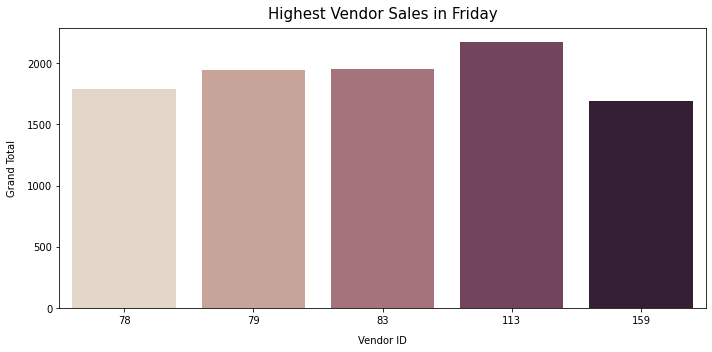

In [392]:
sns.barplot(x="vendor_id", y ="grand_total", palette="ch:.25", data=temp_d)
plt.title('Highest Vendor Sales in Friday', pad=10, fontsize=15)
plt.xlabel('Vendor ID', labelpad=10)
plt.ylabel('Grand Total', labelpad=10)
plt.show()

## Current Plot in 2020-02

In [393]:
test_3 = table_1[table_1['date'] == '2020-02']
test_3 = test_3.groupby('vendor_id')['grand_total'].sum()
test_3 = pd.DataFrame(test_3)
test_3.reset_index(inplace=True)
test_3 = test_3.sort_values('grand_total', ascending=False)

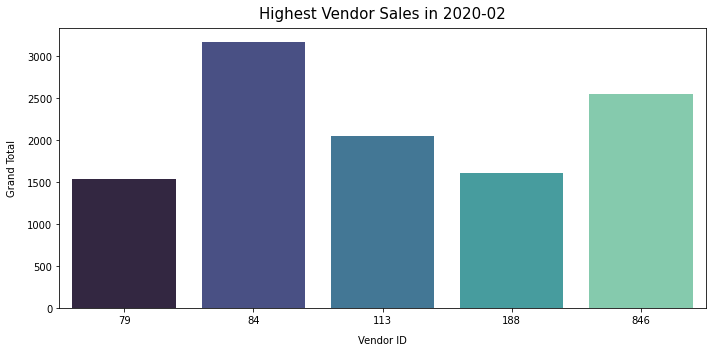

In [394]:
sns.barplot(x="vendor_id", y ="grand_total", palette="mako", data=test_3.head())
plt.title('Highest Vendor Sales in 2020-02', pad=10, fontsize=15)
plt.xlabel('Vendor ID', labelpad=10)
plt.ylabel('Grand Total', labelpad=10)
plt.show()

In [395]:
test_3_age = table_1[table_1['date'] == '2020-02']
test_3_age = test_3_age.groupby('age')['grand_total'].sum()
test_3_age = pd.DataFrame(test_3_age)
test_3_age.reset_index(inplace=True)
test_3_age = test_3_age.sort_values('grand_total', ascending=False)

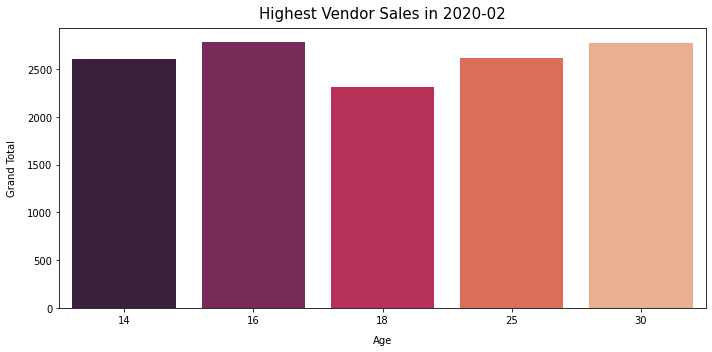

In [396]:
sns.barplot(x="age", y ="grand_total", palette="rocket", data=test_3_age.head())
plt.title('Highest Vendor Sales in 2020-02', pad=10, fontsize=15)
plt.xlabel('Age', labelpad=10)
plt.ylabel('Grand Total', labelpad=10)
plt.show()

## Conclusion

* Based on the data that we have plotted, we can see there is a spike in our time-series plot between date 2019-09 to 2019-10. Also, highest sales for all time is on Friday.

---
* After plotting and diving deeper to our dataset, we can see that our customers are mostly between 13 - 32 years old. Other than that, we can see the customers gender distribution is most likely male with interest in restaurants category, same as female.

---
* For all time sales by vendor we can see vendor ID 113 has the biggest total sales for all time and also highest sales in Friday.

---

* As for the current date, in our chart vendor ID 84 has given the biggest total sales for now.

## Recommendations

* If we want to boost our revenue, let's make some discount that will attract customers between 13 - 32 years old then collect their data to see their behavior and interest on our products. For discount, let's prefer to make it on Friday.

---

* Concern on what kind of product does vendor number 84 sell, because this vendor just had the biggest sales for the current date and this is a chance to gain revenue because our hypothesis is this vendor might sell something trending in our society.